# Explore here

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 110)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [7]:
print(df.info())
print(f'''
      shape: {df.shape}''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None

      shape: (3140, 108)


In [8]:
aux = list(df.columns[df.dtypes=='object'])
print(f'Columns dtypes == "object": {aux}')

Columns dtypes == "object": ['COUNTY_NAME', 'STATE_NAME']


In [9]:
unique_var = df.nunique()==1

if any(unique_var): 
    for col in unique_var.index[unique_var] : print(f"The variable {i} content only one category.")
else: print(f"There's no constant variable, or variable with only one category to clean.")


There's no constant variable, or variable with only one category to clean.


In [10]:
aux = df.nunique().sort_values().head()
aux1 = df.nunique().sort_values().tail()
print(f''' 
      Unique values sorted head(5):
      
      {aux}
      
      Unique values sorted tail(5)
      
      {aux1}
      ''')


 
      Unique values sorted head(5):
      
      Urban_rural_code                                                           6
Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)    30
Active General Surgeons per 100000 Population 2018 (AAMC)                 32
CKD_Lower 95% CI                                                          39
CKD_prevalence                                                            43
dtype: int64
      
      Unique values sorted tail(5)
      
      % White-alone               3139
70-79 y/o % of total pop    3139
80+ y/o % of total pop      3139
60-69 y/o % of total pop    3139
fips                        3140
dtype: int64
      


In [11]:
aux = pd.DataFrame(list(df.columns))
print(aux)

                                                     0
0                                                 fips
1                                              TOT_POP
2                                                  0-9
3                               0-9 y/o % of total pop
4                                               19-Oct
5                             10-19 y/o % of total pop
6                                                20-29
7                             20-29 y/o % of total pop
8                                                30-39
9                             30-39 y/o % of total pop
10                                               40-49
11                            40-49 y/o % of total pop
12                                               50-59
13                            50-59 y/o % of total pop
14                                               60-69
15                            60-69 y/o % of total pop
16                                               70-79
17        

In [12]:
aux = ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'] # descarto estas columnas para trabajar mejor con su equivalente en % (ya normalizado)
depured_df = df.drop(columns=aux)
depured_df = depured_df.drop(columns=['COUNTY_NAME', 'STATE_NAME']) # descarto estas tambien, si las necesito las tengo en df (pero ya tengo la columna "FIPS" y 'COUNTY FIPS')
aux1 = ['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', 
        '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop'] # a estas les voy a cambiar el nombre y las paso a valor absoluto
depured_df[aux1] = depured_df[aux1]/100
aux2 = '% ' #le agrego esto a los nombres de las col borradas para que se visibilize mejor
dic_aux = dict(zip(aux1, (aux2+i for i in aux[1:])))
depured_df.head()

,fips,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,0.122066,0.137354,0.123703,0.127498,0.136364,0.139170,0.104782,0.072840,0.036222,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,0.113553,0.123442,0.108150,0.115644,0.125391,0.137537,0.137289,0.096027,0.042968,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,0.109803,0.118966,0.131345,0.128652,0.123548,0.131747,0.123628,0.090189,0.042120,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,0.184880,307,1.233873,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,5.2,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.

In [13]:
aux = depured_df.isna().sum().sum()
if aux > 0 : print(f"There are {aux} nan values in the df") 
else : print(f"There are no nan values in the df")

There are no nan values in the df


In [14]:
# Elimino las columnas que entiendo que no me interesan para el objetivo: 
aux = ['White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop', 
'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
'POVALL_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'Total Population',
'Population Aged 60+', 'Percent of Population Aged 60+', 'county_pop2018_18 and older', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'anycondition_number',
'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI','COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number', 
'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number', 'Urban_rural_code', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018',
'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Obesity_number']
depured_df = depured_df.drop(columns=aux)

In [15]:
# Llevo los valores expresados en porcentajes a val abs
aux = ['% White-alone','% Black-alone','% NA/AI-alone','% Asian-alone','% Hawaiian/PI-alone','% Two or more races','R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018',
       'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18',
       "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 
       'Family Medicine/General Practice Primary Care (2019)', 'PCTPOVALL_2018','PCTPOV017_2018','PCTPOV517_2018', 'Unemployment_rate_2018', 
       'Med_HH_Income_Percent_of_State_Total_2018', 'anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 
       'diabetes_prevalence', 'CKD_prevalence']
depured_df[aux] = depured_df[aux]/100

depured_df.head()

,fips,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,POP_ESTIMATE_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,Heart disease_number,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,1001,0.122066,0.137354,0.123703,0.127498,0.136364,0.139170,0.104782,0.072840,0.036222,0.767252,0.196309,0.004802,0.012248,0.001115,0.018273,55601,0.118,0.096,0.022,0.000,0.007,0.006,0.113,0.326,0.284,0.277,0.138,0.193,0.195,59338,0.036,1.190,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,0.212491,72.142154,6,1,1,0.476,0.358,0.079,3345,0.086,0.129,0.031
1,1003,0.113553,0.123442,0.108150,0.115644,0.125391,0.137537,0.137289,0.096027,0.042968,0.872852,0.089404,0.007724,0.011503,0.000670,0.017847,218022,0.105,0.103,0.001,0.005,0.243,0.248,0.097,0.276,0.313,0.313,0.098,0.139,0.131,57588,0.036,1.155,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,0.833216,282.882982,51,1,3,0.402,0.297,0.078,13414,0.086,0.120,0.032
2,1005,0.109803,0.118966,0.131345,0.128652,0.123548,0.131747,0.123628,0.090189,0.042120,0.490696,0.483984,0.006591,0.004542,0.001849,0.012339,24881,0.104,0.129,-0.025,0.005,-0.091,-0.086,0.270,0.357,0.251,0.122,0.309,0.439,0.367,34382,0.052,0.689,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,0.095088,32.283033,5,1,5,0.575,0.407,0.110,2159,0.121,0.197,0.045
3,1007,0.109643,0.115893,0.135223,0.138973,0.135625,0.139063,0.113616,0.076920,0.035045,0.768348,0.212946,0.004375,0.002366,0.001161,0.010804,22400,0.111,0.114,-0.003,0.004,-0.070,-0.066,0.168,0.473,0.244,0.115,0.218,0.278,0.263,46064,0.040,0.923,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,0.085606,29.063942,0,1,7,0.516,0.387,0.086,1533,0.100,0.141,0.033
4,1009,0.122666,0.130878,0.116563,0.119018,0.129219,0.135615,0.120418,0.085252,0.040370,0.958783,0.016425,0.006535,0.003198,0.001210,0.013849,57840,0.118,0.114,0.003,0.001,-0.002,0.000,0.198,0.340,0.335,0.126,0.132,0.180,0.155,50412,0.035,1.011,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,0.221047,75.047251,6,1,9,0.463,0.340,0.092,4101,0.105,0.135,0.034


In [16]:
# Veo las columnas a normalizar 
aux3 = (depured_df > 1).any()
dep_df_noperc_columns = aux3[aux3==True].index.to_list()
dep_df_noperc_columns

['fips',
 'POP_ESTIMATE_2018',
 'MEDHHINC_2018',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'Total nurse practitioners (2019)',
 'Total physician assistants (2019)',
 'Total Hospitals (2019)',
 'Internal Medicine Primary Care (2019)',
 'Family Medicine/General Practice Primary Care (2019)',
 'Total Specialist Physicians (2019)',
 'ICU Beds_x',
 'STATE_FIPS',
 'CNTY_FIPS',
 'Heart disease_number']

In [17]:
columns_not_to_take = ['fips', 'STATE_FIPS', 'CNTY_FIPS']
dep_df_noperc_columns = [col for col in dep_df_noperc_columns if col not in columns_not_to_take]
dep_df_noperc_columns

['POP_ESTIMATE_2018',
 'MEDHHINC_2018',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'Total nurse practitioners (2019)',
 'Total physician assistants (2019)',
 'Total Hospitals (2019)',
 'Internal Medicine Primary Care (2019)',
 'Family Medicine/General Practice Primary Care (2019)',
 'Total Specialist Physicians (2019)',
 'ICU Beds_x',
 'Heart disease_number']

In [18]:
# Dejo unicamente las columnas a trabajar, y escalo las que no son abs values de porcentajes
depured_df.drop(columns=columns_not_to_take, inplace=True)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(depured_df[dep_df_noperc_columns])
depured_df[dep_df_noperc_columns] = df_scaled
depured_df


,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,60-69 y/o % of total pop,70-79 y/o % of total pop,80+ y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,POP_ESTIMATE_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_prevalence,Obesity_prevalence,Heart disease_prevalence,Heart disease_number,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,0.122066,0.137354,0.123703,0.127498,0.136364,0.139170,0.104782,0.072840,0.036222,0.767252,0.196309,0.004802,0.012248,0.001115,0.018273,0.005493,0.118,0.096,0.022,0.000,0.007,0.006,0.113,0.326,0.284,0.277,0.138,0.193,0.195,0.422690,0.036,0.451442,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.007322,0.003004,0.012513,0.004542,0.005465,0.004798,0.002822,0.476,0.358,0.079,0.007677,0.086,0.129,0.031
1,0.113553,0.123442,0.108150,0.115644,0.125391,0.137537,0.137289,0.096027,0.042968,0.872852,0.089404,0.007724,0.011503,0.000670,0.017847,0.021566,0.105,0.103,0.001,0.005,0.243,0.248,0.097,0.276,0.313,0.313,0.098,0.139,0.131,0.410224,0.036,0.438164,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.028731,0.011794,0.049107,0.017832,0.021453,0.018834,0.023989,0.402,0.297,0.078,0.030836,0.086,0.120,0.032
2,0.109803,0.118966,0.131345,0.128652,0.123548,0.131747,0.123628,0.090189,0.042120,0.490696,0.483984,0.006591,0.004542,0.001849,0.012339,0.002453,0.104,0.129,-0.025,0.005,-0.091,-0.086,0.270,0.357,0.251,0.122,0.309,0.439,0.367,0.244917,0.052,0.261381,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.003273,0.001342,0.005591,0.002028,0.002441,0.002143,0.002352,0.575,0.407,0.110,0.004950,0.121,0.197,0.045
3,0.109643,0.115893,0.135223,0.138973,0.135625,0.139063,0.113616,0.076920,0.035045,0.768348,0.212946,0.004375,0.002366,0.001161,0.010804,0.002208,0.111,0.114,-0.003,0.004,-0.070,-0.066,0.168,0.473,0.244,0.115,0.218,0.278,0.263,0.328133,0.040,0.350152,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.002946,0.001207,0.005032,0.001825,0.002197,0.001928,0.000000,0.516,0.387,0.086,0.003510,0.100,0.141,0.033
4,0.122666,0.130878,0.116563,0.119018,0.129219,0.135615,0.120418,0.085252,0.040370,0.958783,0.016425,0.006535,0.003198,0.001210,0.013849,0.005715,0.118,0.114,0.003,0.001,-0.002,0.000,0.198,0.340,0.335,0.126,0.132,0.180,0.155,0.359106,0.035,0.383536,0.039347,0.049302,0.068234,0.084602,0.101523,0.186275,0.007617,0.003125,0.013017,0.004725,0.005686,0.004991,0.002822,0.463,0.340,0.092,0.009416,0.105,0.135,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.141785,0.146942,0.124480,0.152772,0.123900,0.122204,0.114817,0.051056,0.022044,0.938352,0.013751,0.015447,0.010104,0.001580,0.020766,0.004251,0

In [19]:
aux3 = (depured_df > 1).any()
dep_df_noperc_columns = aux3[aux3==True].index.to_list()
print(f'Columns to be normalized: {dep_df_noperc_columns}.')


Columns to be normalized: [].


In [20]:
# Variables independientes/dependiente
X = depured_df.drop(['Heart disease_number'], axis=1)
y = depured_df['Heart disease_number']

In [21]:
# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance


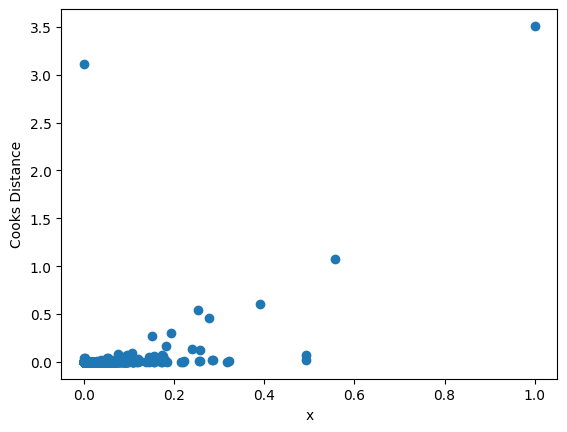

In [22]:
plt.scatter(depured_df['Heart disease_number'], cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
# Si la distancia es mayor de 4/n se considera observación influyente
pto_corte = 4/len(X)
pto_corte


0.0012738853503184713

In [24]:
# observaciones influyentes
len(np.where(cooks_distance[0]>pto_corte)[0])/len(X)*100


4.394904458598726

In [25]:
# descarto las influyentes
print(depured_df.shape)
depured_df.drop(np.where(cooks_distance[0]>pto_corte)[0], inplace=True)
depured_df.shape

(3140, 52)


(3002, 52)

In [26]:
# 80% del dataset para entrenamiento y un 20% para conjunto de test.
X = depured_df.drop(columns='Heart disease_number', axis=1)
y = depured_df['Heart disease_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp


,Feature,Importance
15,POP_ESTIMATE_2018,60.785030
10,% Black-alone,10.715266
44,ICU Beds_x,9.959332
9,% White-alone,5.538482
38,Total nurse practitioners (2019),4.053384
43,Total Specialist Physicians (2019),2.194933
4,40-49 y/o % of total pop,1.171547
47,Heart disease_prevalence,0.651169
49,diabetes_prevalence,0.604286
36,Active General Surgeons per 100000 Population ...,0.512408


In [28]:
# Punto de corte
df_imp[df_imp.Importance>=0.5].Feature.values

array(['POP_ESTIMATE_2018', '% Black-alone', 'ICU Beds_x',
       '% White-alone', 'Total nurse practitioners (2019)',
       'Total Specialist Physicians (2019)', '40-49 y/o % of total pop',
       'Heart disease_prevalence', 'diabetes_prevalence',
       'Active General Surgeons per 100000 Population 2018 (AAMC)'],
      dtype=object)

In [29]:
# Dejo las columnas del punto de corte
X_train = X_train[df_imp[df_imp.Importance>=0.5].Feature.values]
X_test = X_test[df_imp[df_imp.Importance>=0.5].Feature.values]


In [30]:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif


POP_ESTIMATE_2018                                            2240.634172
% Black-alone                                                  77.780692
ICU Beds_x                                                    119.957063
% White-alone                                                  62.610745
Total nurse practitioners (2019)                             5368.857089
Total Specialist Physicians (2019)                           7050.161179
40-49 y/o % of total pop                                        4.582737
Heart disease_prevalence                                      283.723847
diabetes_prevalence                                           378.908542
Active General Surgeons per 100000 Population 2018 (AAMC)       4.568976
dtype: float64

In [31]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,POP_ESTIMATE_2018,% Black-alone,ICU Beds_x,% White-alone,Total nurse practitioners (2019),Total Specialist Physicians (2019),40-49 y/o % of total pop,Heart disease_prevalence,diabetes_prevalence,Active General Surgeons per 100000 Population 2018 (AAMC),y
POP_ESTIMATE_2018,1.000,0.075,0.832,-0.132,0.956,0.961,0.216,-0.396,-0.262,0.058,0.988
% Black-alone,0.075,1.000,0.133,-0.850,0.076,0.058,0.088,0.087,0.496,-0.103,0.085
ICU Beds_x,0.832,0.133,1.000,-0.168,0.789,0.772,0.114,-0.301,-0.175,0.024,0.853
% White-alone,-0.132,-0.850,-0.168,1.000,-0.123,-0.108,-0.025,-0.053,-0.450,0.043,-0.132
Total nurse practitioners (2019),0.956,0.076,0.789,-0.123,1.000,0.980,0.220,-0.386,-0.265,0.129,0.957
Total Specialist Physicians (2019),0.961,0.058,0.772,-0.108,0.980,1.000,0.198,-0.367,-0.259,0.128,0.957
40-49 y/o % of total pop,0.216,0.088,0.114,-0.025,0.220,0.198,1.000,-0.176,-0.043,0.001,0.217
Heart disease_prevalence,-0.396,0.087,-0.301,-0.053,-0.386,-0.367,-0.176,1.000,0.831,0.014,-0.356
diabetes_prevalence,-0.262,0.496,-0.175,-0.450,-0.265,-0.259,-0.043,0.831,1.000,-0.114,-0.231
Active General Surgeons per 100000 Population 2018 (AAMC),0.058,-0.103,0.024,0.043,0.129,0.128,0.001,0.014,-0.114,1.000,0.074


In [32]:
X_train.drop(['Total nurse practitioners (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x'], axis=1, inplace=True)
X_test.drop(['Total nurse practitioners (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x'], axis=1, inplace=True)

In [33]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,POP_ESTIMATE_2018,% Black-alone,% White-alone,40-49 y/o % of total pop,Heart disease_prevalence,diabetes_prevalence,Active General Surgeons per 100000 Population 2018 (AAMC),y
POP_ESTIMATE_2018,1.000,0.075,-0.132,0.216,-0.396,-0.262,0.058,0.988
% Black-alone,0.075,1.000,-0.850,0.088,0.087,0.496,-0.103,0.085
% White-alone,-0.132,-0.850,1.000,-0.025,-0.053,-0.450,0.043,-0.132
40-49 y/o % of total pop,0.216,0.088,-0.025,1.000,-0.176,-0.043,0.001,0.217
Heart disease_prevalence,-0.396,0.087,-0.053,-0.176,1.000,0.831,0.014,-0.356
diabetes_prevalence,-0.262,0.496,-0.450,-0.043,0.831,1.000,-0.114,-0.231
Active General Surgeons per 100000 Population 2018 (AAMC),0.058,-0.103,0.043,0.001,0.014,-0.114,1.000,0.074
y,0.988,0.085,-0.132,0.217,-0.356,-0.231,0.074,1.000


In [34]:
m_lineal = LinearRegression().fit(X_train, y_train)
y_pred_linear_train = m_lineal.predict(X_train)
y_pred_linear_test = m_lineal.predict(X_test)

In [35]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])


In [36]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.977967,0.000841,3.193581e+10
Test set,0.975155,0.000801,6.829893e+01
Diferencia,-0.002812,-0.000040,-3.193581e+10


In [37]:
m_lineal.coef_

array([ 1.11340171,  0.00413635,  0.00246731,  0.00768548,  0.05448805,
       -0.01359421,  0.00382532])

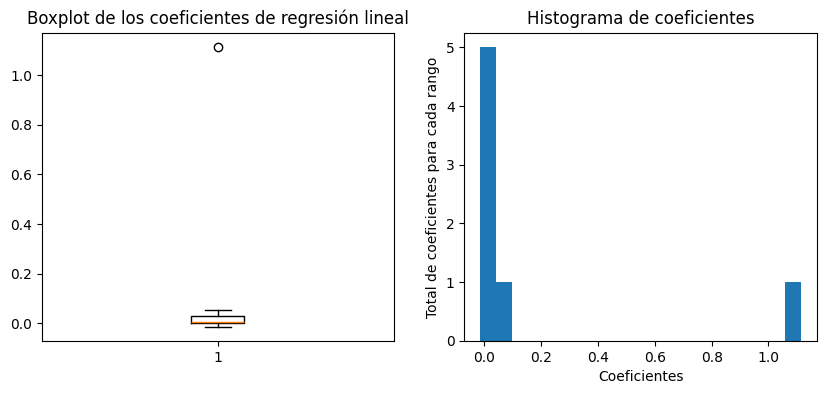

In [38]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_,20)
plt.xlabel('Coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()


In [39]:
# empezamos a trabajar con el modelo de Lasso
m_lasso = LassoCV(alphas=np.logspace(-6,6,10), cv=5, random_state=42, n_jobs=-1).fit(X_train, y_train)

In [40]:
y_pred_lasso_train = m_lasso.predict(X_train)
y_pred_lasso_test = m_lasso.predict(X_test)

In [41]:
get_metrics(y_pred_linear_test, y_test, y_pred_linear_train, y_train)

,R2,Median AE,MAPE
Train set,0.977967,0.000841,3.193581e+10
Test set,0.975155,0.000801,6.829893e+01
Diferencia,-0.002812,-0.000040,-3.193581e+10


In [42]:
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

,R2,Median AE,MAPE
Train set,0.977822,0.000846,1.243439e+11
Test set,0.975470,0.000792,6.917077e+01
Diferencia,-0.002352,-0.000055,-1.243439e+11


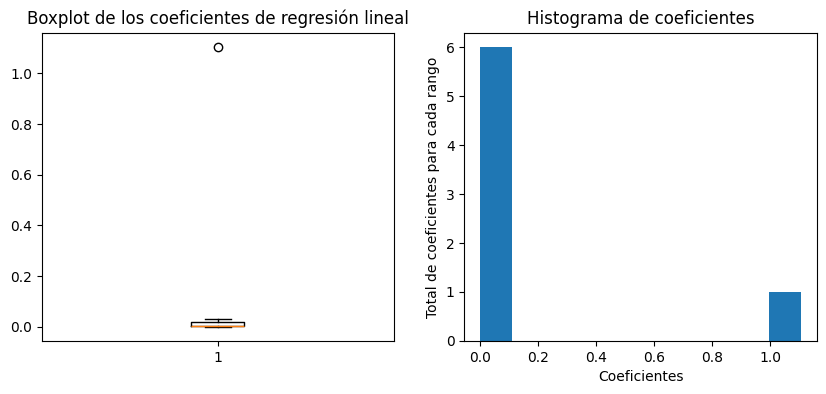

In [43]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()


In [44]:
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')


El porcentaje de variables canceladas es: 14.29%
El modelo utiliza 6 variables.


In [45]:
# vamos con el ridge
m_ridge = RidgeCV(alphas=np.logspace(-6,6,10), cv=5).fit(X_train, y_train)


In [46]:
y_pred_ridge_train = m_ridge.predict(X_train)
y_pred_ridge_test = m_ridge.predict(X_test)


In [55]:
print(f'Ridge Method Metrics (Test): ')
get_metrics(y_pred_ridge_test, y_test, y_pred_ridge_train, y_train)

Ridge Method Metrics (Test): 


,R2,Median AE,MAPE
Train set,0.977966,0.000844,3.221659e+10
Test set,0.975245,0.000807,6.858637e+01
Diferencia,-0.002720,-0.000037,-3.221659e+10


In [57]:
print(f'TO COMPARE. Lasso Method Metrics (Test): ')
get_metrics(y_pred_lasso_test, y_test, y_pred_lasso_train, y_train)

TO COMPARE. Lasso Method Metrics (Test): 


,R2,Median AE,MAPE
Train set,0.977822,0.000846,1.243439e+11
Test set,0.975470,0.000792,6.917077e+01
Diferencia,-0.002352,-0.000055,-1.243439e+11


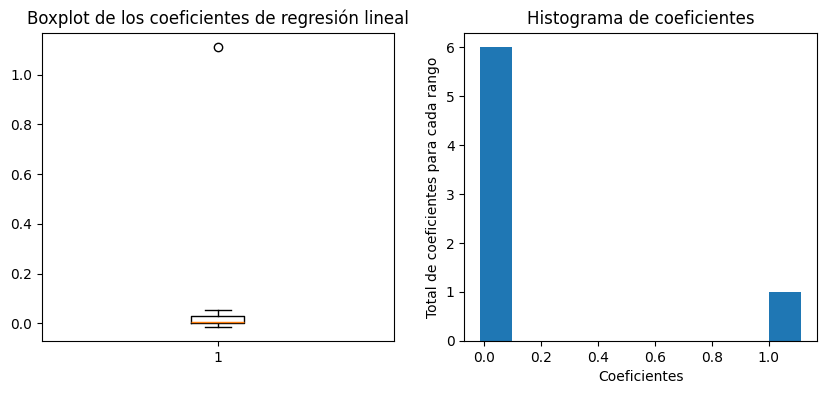

In [48]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Coeficientes')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [58]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 7 variables.
